In [1]:
import sqlite3
import pandas as pd

# Path to the SQLite database
db_path = './data/maindatabase.db'

# Establish a connection to the database
conn = sqlite3.connect(db_path)

# Query to load the 'income_usa' table
income_query = "SELECT * FROM income_usa"
income_df = pd.read_sql_query(income_query, conn)

# Query to load the 'hause_expense_usa' table
hause_expense_query = "SELECT * FROM hause_expense_usa"
hause_expense_df = pd.read_sql_query(hause_expense_query, conn)

# Display the tables
print("Income USA Table:")
display(income_df.head())

print("Hause Expense USA Table:")
display(hause_expense_df.head())

# Join the two tables on the 'zip_code' column
joined_query = """
SELECT 
    hause_expense_usa.zip_code, 
    hause_expense_usa.state, 
    hause_expense_usa.country, 
    hause_expense_usa.living_space, 
    hause_expense_usa.beds, 
    hause_expense_usa.baths, 
    hause_expense_usa.price, 
    income_usa.income AS average_income
FROM 
    hause_expense_usa
INNER JOIN 
    income_usa 
ON 
    hause_expense_usa.zip_code = income_usa.zip_code
"""
joined_df = pd.read_sql_query(joined_query, conn)

# Display the joined table
print("Joined Table:")
display(joined_df.head())

# Close the database connection
conn.close()


Income USA Table:


,state,zip_code,total_pop,income,country,avg_income
0,AK,0,345220,25354974,USA,73445.843230
1,AK,99501,7690,612242,USA,79615.344603
2,AK,99502,11860,1000685,USA,84374.789207
3,AK,99503,7510,462394,USA,61570.439414
4,AK,99504,19440,1176109,USA,60499.434156


Hause Expense USA Table:


,zip_code,price,beds,baths,living_space,Address,City,state,Zip Code Population,Zip Code Density,country,income,Latitude,Longitude
0,10013,3999000.0,2,3,1967,74 GRAND ST APT 3,New York,New York,29563,20967.9,New York,370046.0,40.72001,-74.00472
1,10013,3999000.0,2,3,1967,74 GRAND ST APT 3,New York,New York,29563,20967.9,New York,370046.0,40.72001,-74.00472
2,10014,1650000.0,1,1,718,140 CHARLES ST APT 4D,New York,New York,29815,23740.9,New York,249880.0,40.73407,-74.00601
3,10014,760000.0,3,2,1538,38 JONES ST,New York,New York,29815,23740.9,New York,249880.0,40.73407,-74.00601
4,10014,1100000.0,1,1,600,81 BEDFORD ST APT 3F,New York,New York,29815,23740.9,New York,249880.0,40.73407,-74.00601


Joined Table:


,zip_code,state,country,living_space,beds,baths,price,average_income
0,10013,New York,New York,1967,2,3,3999000.0,7947938
1,10013,New York,New York,1967,2,3,3999000.0,7947938
2,10014,New York,New York,718,1,1,1650000.0,6795181
3,10014,New York,New York,1538,3,2,760000.0,6795181
4,10014,New York,New York,600,1,1,1100000.0,6795181


In [2]:
import sqlite3
import pandas as pd

# Path to the SQLite database
db_path = './data/maindatabase.db'

# Establish a connection to the database
conn = sqlite3.connect(db_path)

# SQL query to join the two tables on 'zip_code' and select specific columns
joined_query = """
SELECT 
    hause_expense_usa.zip_code, 
    hause_expense_usa.state, 
    hause_expense_usa.country, 
    hause_expense_usa.living_space, 
    hause_expense_usa.beds, 
    hause_expense_usa.baths, 
    hause_expense_usa.price, 
    income_usa.income AS average_income
FROM 
    hause_expense_usa
INNER JOIN 
    income_usa 
ON 
    hause_expense_usa.zip_code = income_usa.zip_code
"""
# Execute the query and load the joined table into a pandas DataFrame
joined_df = pd.read_sql_query(joined_query, conn)

# Display the joined table
display(joined_df)

# Close the database connection
conn.close()


,zip_code,state,country,living_space,beds,baths,price,average_income
0,10013,New York,New York,1967,2,3,3999000.0,7947938
1,10013,New York,New York,1967,2,3,3999000.0,7947938
2,10014,New York,New York,718,1,1,1650000.0,6795181
3,10014,New York,New York,1538,3,2,760000.0,6795181
4,10014,New York,New York,600,1,1,1100000.0,6795181
...,...,...,...,...,...,...,...,...
39882,98199,Washington,King,3380,4,4,2495000.0,2235790
39883,98199,Washington,King,2878,4,4,2295000.0,2235790
39884,98199,Washington,King,1380,3,2,950000.0,2235790
39885,98199,Washington,King,856,2,1,425000.0,2235790


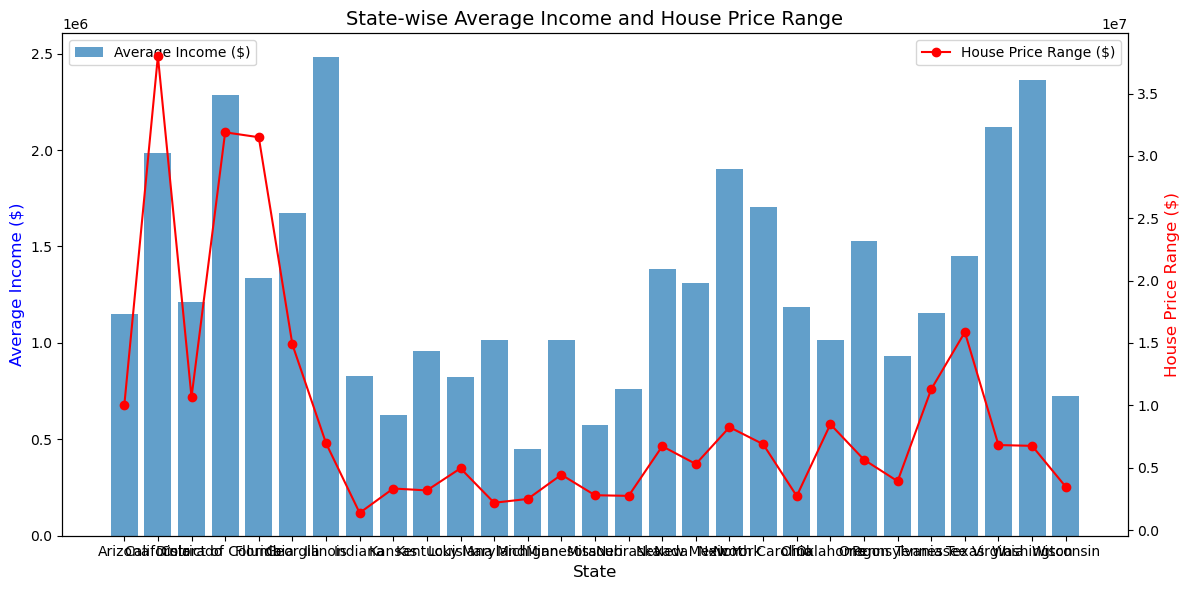

In [3]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Path to the SQLite database
db_path = './data/maindatabase.db'

# Establish a connection to the database
conn = sqlite3.connect(db_path)

# SQL query to join the two tables on 'zip_code' and select specific columns
joined_query = """
SELECT 
    hause_expense_usa.state, 
    hause_expense_usa.price, 
    income_usa.income AS average_income
FROM 
    hause_expense_usa
INNER JOIN 
    income_usa 
ON 
    hause_expense_usa.zip_code = income_usa.zip_code
"""
# Execute the query and load the joined table into a pandas DataFrame
joined_df = pd.read_sql_query(joined_query, conn)

# Close the database connection
conn.close()

# Group by state and calculate metrics
statewise_data = joined_df.groupby('state').agg(
    average_income=('average_income', 'mean'),
    max_price=('price', 'max'),
    min_price=('price', 'min')
)

# Calculate price range (max - min)
statewise_data['price_range'] = statewise_data['max_price'] - statewise_data['min_price']

# Reset index for plotting
statewise_data.reset_index(inplace=True)

# Plot bar chart for state-wise income and house price range
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar chart for average income
ax1.bar(statewise_data['state'], statewise_data['average_income'], alpha=0.7, label='Average Income ($)')

# Line plot for house price range
ax2 = ax1.twinx()
ax2.plot(statewise_data['state'], statewise_data['price_range'], color='red', marker='o', label='House Price Range ($)')

# Add labels and titles
ax1.set_xlabel('State', fontsize=12)
ax1.set_ylabel('Average Income ($)', fontsize=12, color='blue')
ax2.set_ylabel('House Price Range ($)', fontsize=12, color='red')
plt.title('State-wise Average Income and House Price Range', fontsize=14)

# Add legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


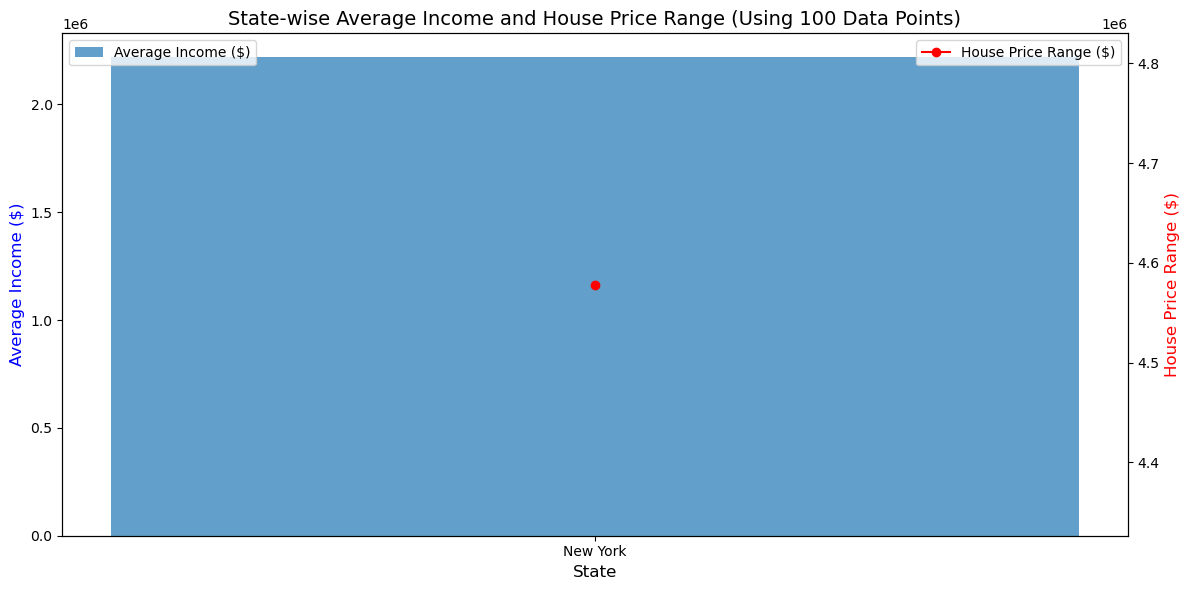

In [4]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Path to the SQLite database
db_path = './data/maindatabase.db'

# Establish a connection to the database
conn = sqlite3.connect(db_path)

# SQL query to join the two tables on 'zip_code' and select specific columns
# Limit to 100 rows
joined_query = """
SELECT 
    hause_expense_usa.state, 
    hause_expense_usa.price, 
    income_usa.income AS average_income
FROM 
    hause_expense_usa
INNER JOIN 
    income_usa 
ON 
    hause_expense_usa.zip_code = income_usa.zip_code
LIMIT 100
"""
# Execute the query and load the joined table into a pandas DataFrame
joined_df = pd.read_sql_query(joined_query, conn)

# Close the database connection
conn.close()

# Group by state and calculate metrics
statewise_data = joined_df.groupby('state').agg(
    average_income=('average_income', 'mean'),
    max_price=('price', 'max'),
    min_price=('price', 'min')
)

# Calculate price range (max - min)
statewise_data['price_range'] = statewise_data['max_price'] - statewise_data['min_price']

# Reset index for plotting
statewise_data.reset_index(inplace=True)

# Plot bar chart for state-wise income and house price range
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar chart for average income
ax1.bar(statewise_data['state'], statewise_data['average_income'], alpha=0.7, label='Average Income ($)')

# Line plot for house price range
ax2 = ax1.twinx()
ax2.plot(statewise_data['state'], statewise_data['price_range'], color='red', marker='o', label='House Price Range ($)')

# Add labels and titles
ax1.set_xlabel('State', fontsize=12)
ax1.set_ylabel('Average Income ($)', fontsize=12, color='blue')
ax2.set_ylabel('House Price Range ($)', fontsize=12, color='red')
plt.title('State-wise Average Income and House Price Range (Using 100 Data Points)', fontsize=14)

# Add legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


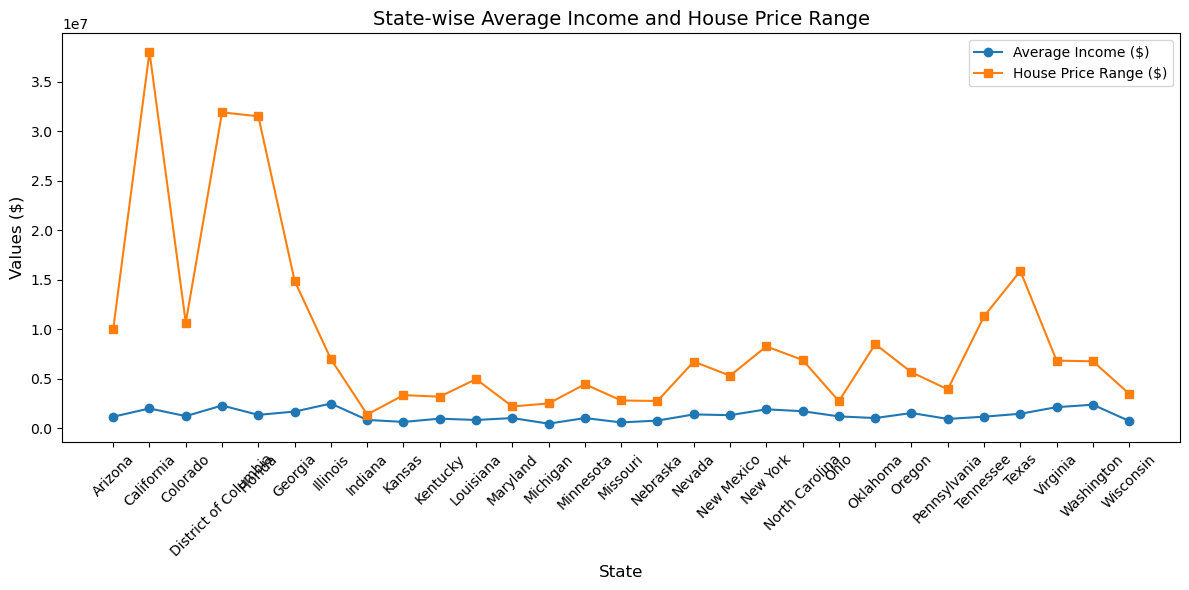

In [6]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Path to the SQLite database
db_path = './data/maindatabase.db'

# Establish a connection to the database
conn = sqlite3.connect(db_path)

# SQL query to join the two tables on 'zip_code' and select specific columns
joined_query = """
SELECT 
    hause_expense_usa.state, 
    hause_expense_usa.price, 
    income_usa.income AS average_income
FROM 
    hause_expense_usa
INNER JOIN 
    income_usa 
ON 
    hause_expense_usa.zip_code = income_usa.zip_code
"""
# Execute the query and load the joined table into a pandas DataFrame
joined_df = pd.read_sql_query(joined_query, conn)

# Close the database connection
conn.close()

# Group by state and calculate metrics
statewise_data = joined_df.groupby('state').agg(
    average_income=('average_income', 'mean'),
    max_price=('price', 'max'),
    min_price=('price', 'min')
)

# Calculate price range (max - min)
statewise_data['price_range'] = statewise_data['max_price'] - statewise_data['min_price']

# Reset index for plotting
statewise_data.reset_index(inplace=True)

# Plot line charts for average income and price range
plt.figure(figsize=(12, 6))
plt.plot(statewise_data['state'], statewise_data['average_income'], marker='o', label='Average Income ($)')
plt.plot(statewise_data['state'], statewise_data['price_range'], marker='s', label='House Price Range ($)')

# Add labels and titles
plt.xlabel('State', fontsize=12)
plt.ylabel('Values ($)', fontsize=12)
plt.title('State-wise Average Income and House Price Range', fontsize=14)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()
